---
# Decision Tree

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JamilyaSultan/RICE_INDE-577/blob/main/Supervised%20Learning/Decision%20Tree/Decision%20Tree.ipynb)

A tree has many analogies in real life, and turns out that it has influenced a wide area of machine learning, covering both classification and regression. In decision analysis, a decision tree can be used to visually and explicitly represent decisions and decision making. As the name goes, it uses a tree-like model of decisions. Though a commonly used tool in data mining for deriving a strategy to reach a particular goal, its also widely used in machine learning.
It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.


<img src="decision-tree-classification-algorithm.png" alt="Drawing" style="width: 500px;"/>

https://www.javatpoint.com/machine-learning-decision-tree-classification-algorithm

---

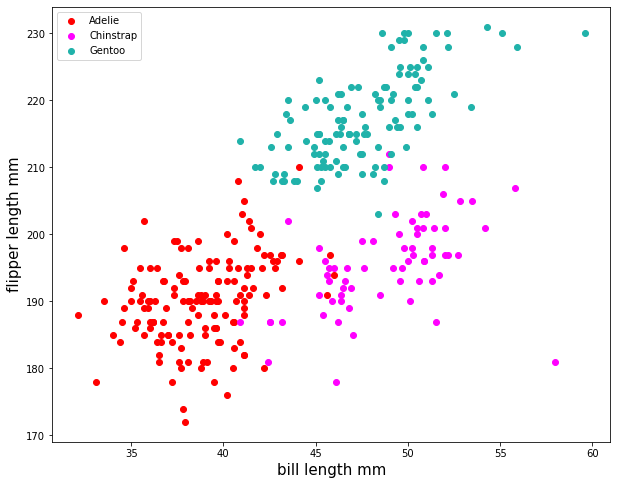

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 

# Import the data
df = pd.read_csv("palmer_penguins.csv") 
df.dropna(inplace = True)

# Plot the data
penguins = ["Adelie", "Chinstrap", "Gentoo"]
colors = ["red", "magenta", "lightseagreen"]

fig, ax = plt.subplots(figsize = (10, 8))
for species, color in zip(penguins, colors):
    temp_df = df[df.species == species]
    ax.scatter(temp_df.bill_length_mm,
               temp_df.flipper_length_mm,
               c = color,
               label = species, 
               )
    
ax.set_xlabel("bill length mm", fontsize = 15)
ax.set_ylabel("flipper length mm", fontsize = 15)
ax.legend()
plt.show()




In [9]:
from sklearn.model_selection import train_test_split


# Grab Adelie and Chinstrap
df = df[df["species"] != "Gentoo"]

# Create feature matrix
X = df[["bill_length_mm","flipper_length_mm"]].to_numpy()

# Define labeling function
def make_labels(y):
    if y == "Adelie":
        return 0
    else:
        return 1
    
        
# Create target value array
y = df["species"].map(make_labels).to_numpy()


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=42)

In [10]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth=15, random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, random_state=42)

|--- bill_length_mm <= 42.35
|   |--- bill_length_mm <= 40.85
|   |   |--- class: 0
|   |--- bill_length_mm >  40.85
|   |   |--- bill_length_mm <= 41.00
|   |   |   |--- flipper_length_mm <= 185.50
|   |   |   |   |--- class: 0
|   |   |   |--- flipper_length_mm >  185.50
|   |   |   |   |--- flipper_length_mm <= 189.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- flipper_length_mm >  189.00
|   |   |   |   |   |--- class: 0
|   |   |--- bill_length_mm >  41.00
|   |   |   |--- class: 0
|--- bill_length_mm >  42.35
|   |--- bill_length_mm <= 44.65
|   |   |--- flipper_length_mm <= 192.00
|   |   |   |--- class: 1
|   |   |--- flipper_length_mm >  192.00
|   |   |   |--- bill_length_mm <= 43.35
|   |   |   |   |--- class: 0
|   |   |   |--- bill_length_mm >  43.35
|   |   |   |   |--- flipper_length_mm <= 206.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- flipper_length_mm >  206.00
|   |   |   |   |   |--- class: 0
|   |--- bill_length_mm >  44.65
|   |   |--- bil

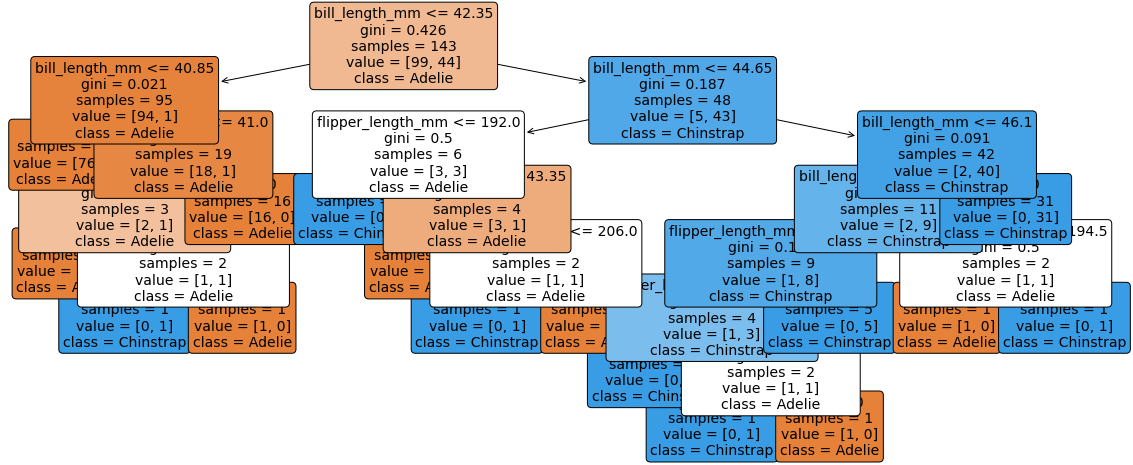

In [13]:
from sklearn.tree import plot_tree
from sklearn.tree import export_text

tree_rules = export_text(decision_tree,
                         feature_names = ["bill_length_mm", "flipper_length_mm"])
print(tree_rules, "\n")


plt.figure(figsize=(20, 8))
a = plot_tree(decision_tree,
                   feature_names = ["bill_length_mm", "flipper_length_mm"],
                   class_names = ["Adelie", "Chinstrap"],
                   rounded = True,
                   filled = True, 
                   fontsize=14)
plt.show()

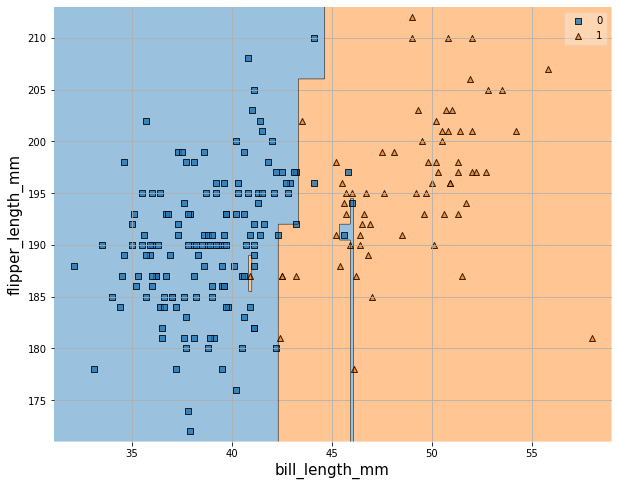

In [14]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = decision_tree)
plt.xlabel("bill_length_mm", fontsize = 15)
plt.ylabel("flipper_length_mm", fontsize = 15)
plt.grid()
plt.show()

The boundary plot does not look perfect with the blue island in the oragne area, where the tree was trying to catch the blue values, but that covered in blue some of the orange items. Playing around with some parameters is always interesting. Let's change the depth from 15 to 10.

In [16]:
decision_tree = DecisionTreeClassifier(max_depth=10, random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

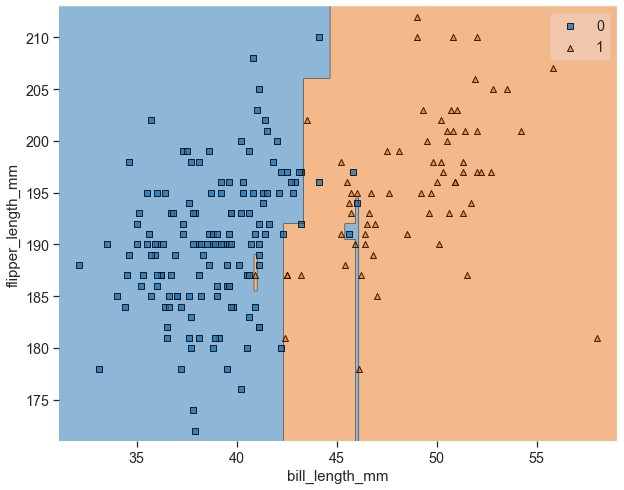

In [17]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = decision_tree)
plt.xlabel("bill_length_mm", fontsize = 15)
plt.ylabel("flipper_length_mm", fontsize = 15)
plt.grid()
plt.show()

Not much change. Let's try even more extreme lower depth to 5.

In [18]:
decision_tree = DecisionTreeClassifier(max_depth=5, random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

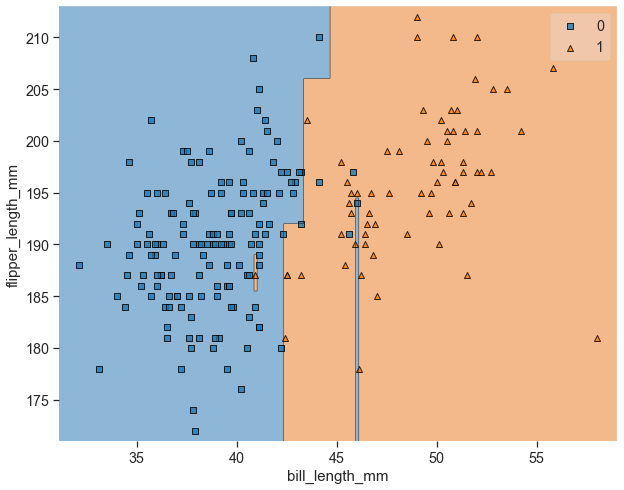

In [19]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = decision_tree)
plt.xlabel("bill_length_mm", fontsize = 15)
plt.ylabel("flipper_length_mm", fontsize = 15)
plt.grid()
plt.show()

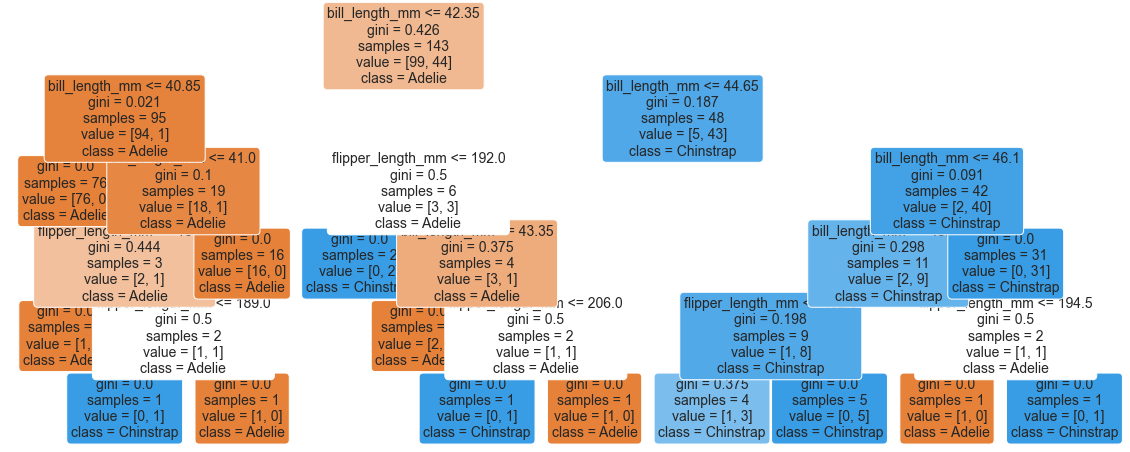

In [21]:
from sklearn.tree import plot_tree
from sklearn.tree import export_text
plt.figure(figsize=(20, 8))
a = plot_tree(decision_tree,
                   feature_names = ["bill_length_mm", "flipper_length_mm"],
                   class_names = ["Adelie", "Chinstrap"],
                   rounded = True,
                   filled = True, 
                   fontsize=14)
plt.show()

I still think that the classification coul be done better. Maybe if increasing the depth to 30.

In [22]:
decision_tree = DecisionTreeClassifier(max_depth=30, random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30, random_state=42)

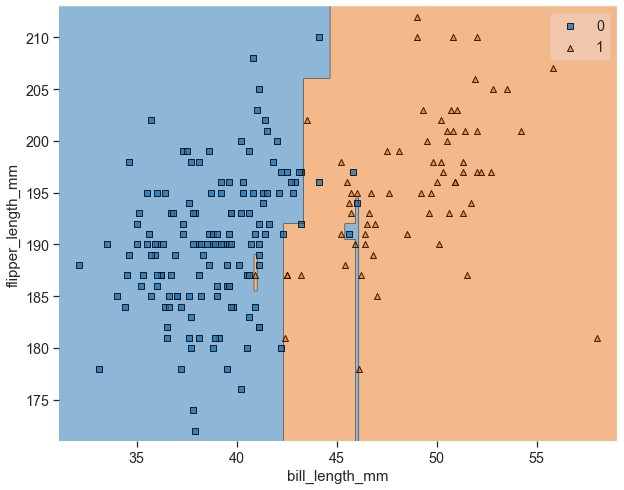

In [23]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = decision_tree)
plt.xlabel("bill_length_mm", fontsize = 15)
plt.ylabel("flipper_length_mm", fontsize = 15)
plt.grid()
plt.show()

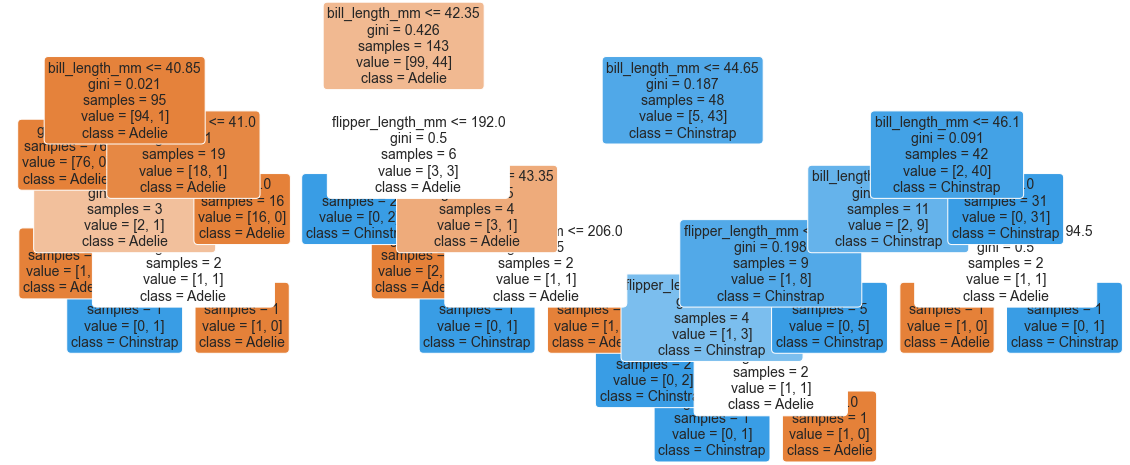

In [24]:
from sklearn.tree import plot_tree
from sklearn.tree import export_text
plt.figure(figsize=(20, 8))
a = plot_tree(decision_tree,
                   feature_names = ["bill_length_mm", "flipper_length_mm"],
                   class_names = ["Adelie", "Chinstrap"],
                   rounded = True,
                   filled = True, 
                   fontsize=14)
plt.show()

Clearly depth of 30 is overfitting the data. 

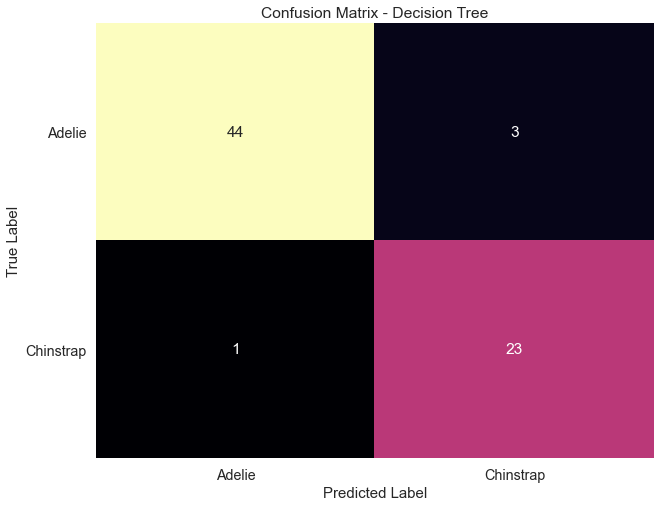

In [25]:
# predicted values on the testing data
test_pred_decision_tree = decision_tree.predict(X_test)

# Import metrics from sklearn 
from sklearn import metrics

# Note: visualizing your tree above will be weird after running seaborn
import seaborn as sns

# The confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, test_pred_decision_tree)

# Convert confusion matrix into dataframe
matrix_df = pd.DataFrame(confusion_matrix)


plt.figure(figsize=(10, 8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df,
            annot = True, 
            fmt = "g",
            ax = ax, 
            cmap = "magma", 
            cbar = False)

ax.set_title("Confusion Matrix - Decision Tree")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_xticklabels(["Adelie", "Chinstrap"])
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(["Adelie", "Chinstrap"], rotation=0)
plt.show()

Prediction performed well on this data.

In [26]:
from sklearn.metrics import classification_report

y_pred = decision_tree.predict(X_test)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        47
           1       0.88      0.96      0.92        24

    accuracy                           0.94        71
   macro avg       0.93      0.95      0.94        71
weighted avg       0.95      0.94      0.94        71



The prediction result from Decision tree is better than the one from K-nearest neighbors, which had f1-score for the 0  = 0.71 and overall accuracy of 87%. 